In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import xgboost as xgb

/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_1947/2786707144.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('wholesale.csv')

## Exploratory Data Analysis (EDA) and Data Cleaning

In [3]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:

data.shape

(440, 8)

In [6]:
print("Number of Rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of Rows 440
Number of columns 8


In [7]:
data.info

<bound method DataFrame.info of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4

In [8]:
dup_data=data.duplicated().any()

In [9]:
print("Are there any duplicated values in the data",dup_data)

Are there any duplicated values in the data False


In [10]:
data = data.drop_duplicates()

In [11]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [12]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Implement Feature Scaling

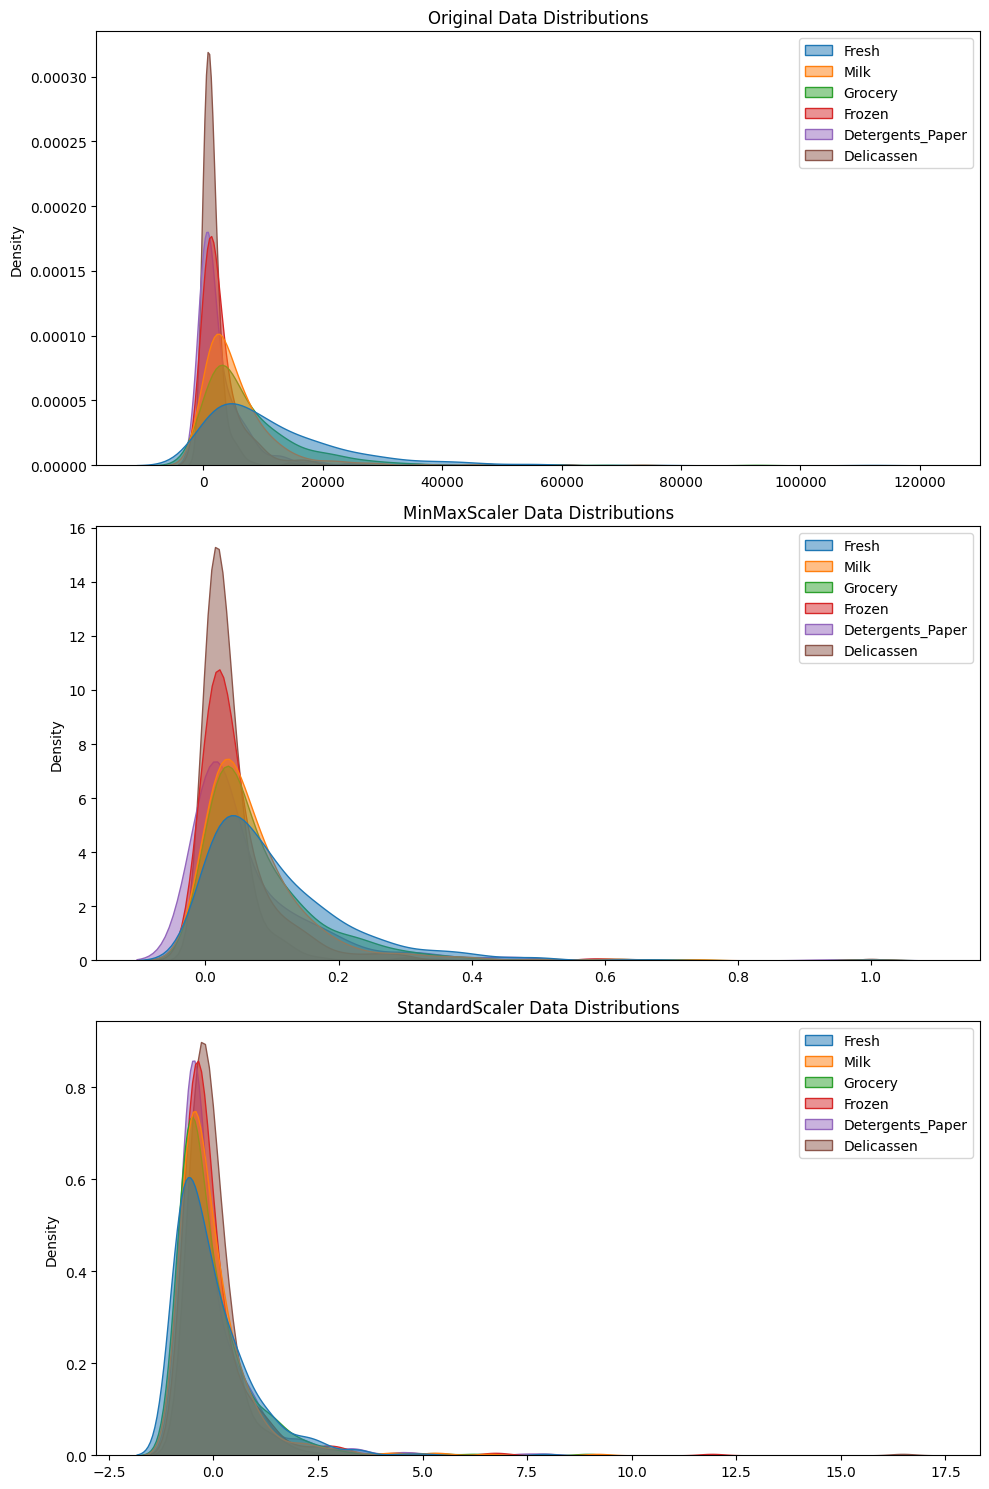

In [13]:


features = data.drop(['Channel', 'Region'], axis=1)
features_names = features.columns

minmax_scaler = MinMaxScaler()
features_minmax = minmax_scaler.fit_transform(features)
features_minmax_df = pd.DataFrame(features_minmax, columns=features_names)

standard_scaler = StandardScaler()
features_standard = standard_scaler.fit_transform(features)
features_standard_df = pd.DataFrame(features_standard, columns=features_names)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.kdeplot(data=features, ax=axs[0], fill=True, common_norm=False, alpha=0.5)
axs[0].set_title('Original Data Distributions')

sns.kdeplot(data=features_minmax_df, ax=axs[1], fill=True, common_norm=False, alpha=0.5)
axs[1].set_title('MinMaxScaler Data Distributions')

sns.kdeplot(data=features_standard_df, ax=axs[2], fill=True, common_norm=False, alpha=0.5)
axs[2].set_title('StandardScaler Data Distributions')

plt.tight_layout()
plt.show()


MinMaxScaler 
1) Preserves the form of the original distribution. This implies that it does not affect the relative distances between points, making it appropriate for data in which the distribution shape must be maintained.

2) Defined Range: It adjusts the data to a certain range, often [0, 1]. This is especially beneficial in algorithms that need input characteristics to have a limited range, such as neural networks and sigmoid functions.

3) Outliers are sensitive to MinMaxScaler since it scales data depending on the minimum and maximum values. This can lead to information loss due to data variability.

StandardScaler 
1) standardises characteristics by eliminating the mean and scaling them to unit variance. This is critical for models that assume normally distributed input features since it is consistent with the zero mean and unit variance assumptions.
   
2) Compatibility with Common techniques: Many machine learning techniques, like Support Vector Machines, Linear Regression, and PCA, prefer or need standardised data.
   
3) Less Sensitive to Outliers: Unlike MinMaxScaler, StandardScaler's emphasis on variance and mean makes it less sensitive to extreme data values, which can be especially useful when outliers exist.


The choice between StandardScaler and MinMaxScaler is based on model needs and data characteristics. StandardScaler is best suited for models assuming Gaussian distributions, which benefit from data centred at zero with unit variance. MinMaxScaler is suitable for models that are sensitive to absolute feature sizes and require data within a certain range. The option is consistent with algorithm requirements and data structure.

## StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler
features = data.columns.difference(['Channel', 'Region'])
#  StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])
data_scaled = pd.DataFrame(data_scaled, columns=features)
data_scaled.head()

,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
0,-0.066339,-0.043569,0.052933,-0.589367,-0.041115,0.523568
1,0.089151,0.086407,-0.391302,-0.270136,0.170318,0.544458
2,2.243293,0.133232,-0.447029,-0.137536,-0.028157,0.408538
3,0.093411,-0.498588,0.100111,0.687144,-0.392977,-0.624020
4,1.299347,-0.231918,0.840239,0.173859,-0.079356,-0.052396


## Find Optimal Number of Features Using RFECV

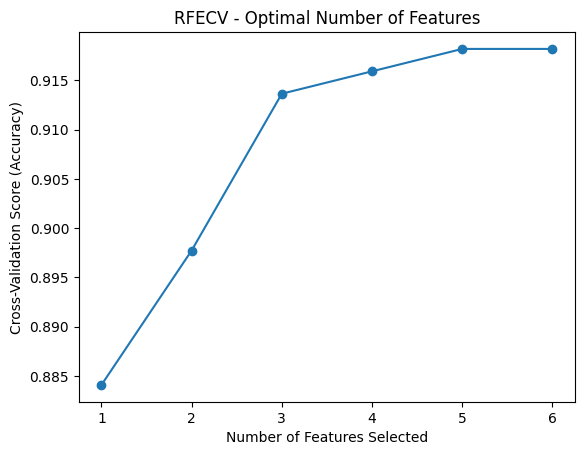

In [15]:
y = data['Channel']
X = data.drop(['Channel', 'Region'], axis=1)  # Exclude 'Region' if it's not relevant

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit the RFECV
estimator = RandomForestClassifier(random_state=42)
selector = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
selector.fit(X_scaled, y)

mean_test_scores = selector.cv_results_['mean_test_score']

# Plotting the RFECV results
plt.figure()
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores, marker='o', linestyle='-')
plt.title("RFECV - Optimal Number of Features")
plt.show()


## KMean Cluster

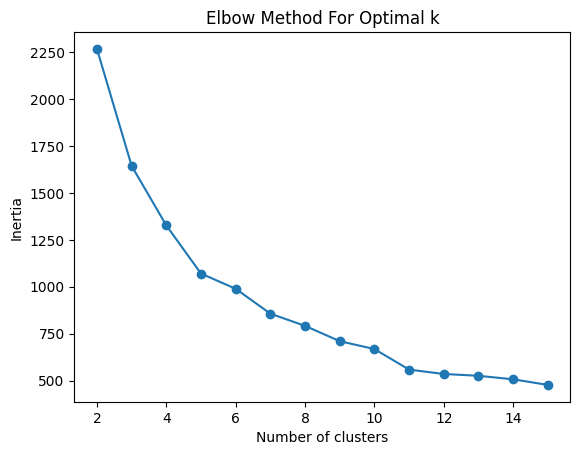

In [16]:
inertia = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(2, 16), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


## Implementing PCA

Variance explained by the first 2 components: 0.7245929240774497
Variance explained by the first 4 components: 0.9418920905750293


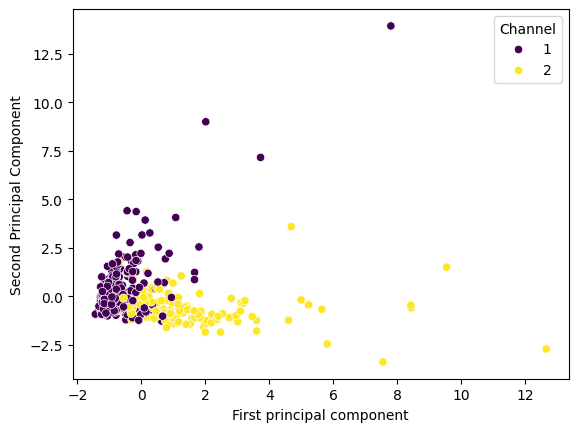

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1])
pca.fit(data_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Variance explained by the first 2 components: {sum(explained_variance[:2])}")
print(f"Variance explained by the first 4 components: {sum(explained_variance[:4])}")
pca_2d = PCA(n_components=2).fit_transform(data_scaled)
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=y, palette='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

## Implementing XG

In [18]:
from sklearn.preprocessing import LabelEncoder

# Re-encode the target variable to start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Now, y_encoded contains classes starting from 0


In [23]:
from sklearn.preprocessing import LabelEncoder

# Re-encode the target variable to start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Assuming your model is already defined and X is your feature set

In [25]:

# Import XGBClassifier
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define metrics to evaluate
scoring = ['accuracy', 'precision_weighted', 'recall_weighted']

# Perform the cross-validation and collect results using the re-encoded y_encoded
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X, y_encoded, cv=5, scoring=scoring)

# Calculate and display average scores
accuracy = cv_results['test_accuracy'].mean()
precision = cv_results['test_precision_weighted'].mean()
recall = cv_results['test_recall_weighted'].mean()

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")


Accuracy: 0.916
Precision: 0.918
Recall: 0.916


## CONCLUSION

Using wholesale customer data, we identified significant variance in consumer buying patterns across product categories. Feature scaling highlighted distribution differences, but RFECV identified the optimal feature set for modelling. KMeans identified a discrete client segmentation, however PCA analysis indicated considerable information encapsulation within the first few components, underlining the intricacy of the diverse consumer base.
The findings proved the effectiveness of preprocessing and feature selection in identifying consumer groups and optimising model performance. RFECV highlighted critical characteristics, whilst PCA and KMeans indicated unique consumer segments. The XGBoost classifier supported these findings by emphasising the necessity of rigorous data analysis in strategic decision-making.